In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
df = pd.read_csv('sensor_events.csv')


In [53]:
df

,Movement Detected,Object Detected,Open/Closed,Sensor Type,Timestamp,Zone
0,NaN,NaN,Open,Window Sensor,2024-03-18 00:12:00,Lobby
1,NaN,NaN,Closed,Window Sensor,2024-03-18 00:04:00,Room 1
2,NaN,NaN,Open,Door Sensor,2024-03-18 00:00:00,Lobby
3,NaN,NaN,Open,Door Sensor,2024-03-18 00:34:00,Main Entrance
4,Yes,NaN,NaN,Motion Sensor,2024-03-18 00:19:00,Hallway
...,...,...,...,...,...,...
95,NaN,NaN,Closed,Door Sensor,2024-03-18 00:12:00,Main Entrance
96,NaN,bag,NaN,Camera,2024-03-18 00:20:00,Main Entrance
97,NaN,NaN,Open,Door Sensor,2024-03-18 00:27:00,Room 2
98,NaN,NaN,Closed,Window Sensor,2024-03-18 00:28:00,Room 2


In [54]:
df.isnull().sum()


Movement Detected    78
Object Detected      74
Open/Closed          48
Sensor Type           0
Timestamp             0
Zone                  0
dtype: int64

In [55]:
# handle missing values of every column
df['Open/Closed'].fillna(df['Open/Closed'].mode()[0], inplace=True)
df['Movement Detected'].fillna(df['Movement Detected'].mode()[0], inplace=True)
df['Object Detected'].fillna(df['Object Detected'].mode()[0],inplace=True)


C:\Users\Shree\AppData\Local\Temp\ipykernel_12772\2297037380.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Open/Closed'].fillna(df['Open/Closed'].mode()[0], inplace=True)
C:\Users\Shree\AppData\Local\Temp\ipykernel_12772\2297037380.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [56]:
df

,Movement Detected,Object Detected,Open/Closed,Sensor Type,Timestamp,Zone
0,Yes,Person,Open,Window Sensor,2024-03-18 00:12:00,Lobby
1,Yes,Person,Closed,Window Sensor,2024-03-18 00:04:00,Room 1
2,Yes,Person,Open,Door Sensor,2024-03-18 00:00:00,Lobby
3,Yes,Person,Open,Door Sensor,2024-03-18 00:34:00,Main Entrance
4,Yes,Person,Open,Motion Sensor,2024-03-18 00:19:00,Hallway
...,...,...,...,...,...,...
95,Yes,Person,Closed,Door Sensor,2024-03-18 00:12:00,Main Entrance
96,Yes,bag,Open,Camera,2024-03-18 00:20:00,Main Entrance
97,Yes,Person,Open,Door Sensor,2024-03-18 00:27:00,Room 2
98,Yes,Person,Closed,Window Sensor,2024-03-18 00:28:00,Room 2


In [57]:
# perform EDA
df.describe()



,Movement Detected,Object Detected,Open/Closed,Sensor Type,Timestamp,Zone
count,100,100,100,100,100,100
unique,2,5,2,4,45,5
top,Yes,Person,Open,Door Sensor,2024-03-18 00:19:00,Main Entrance
freq,92,81,85,29,6,26


In [61]:

# time series analysis
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Timestamp'].dtype


dtype('<M8[ns]')

In [62]:
df['Timestamp'].min(), df['Timestamp'].max()



(Timestamp('2024-03-18 00:00:00'), Timestamp('2024-03-18 00:59:00'))

C:\Users\Shree\AppData\Local\Temp\ipykernel_12772\1831976874.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_events = df.resample('H', on='Timestamp')['Movement Detected'].count()


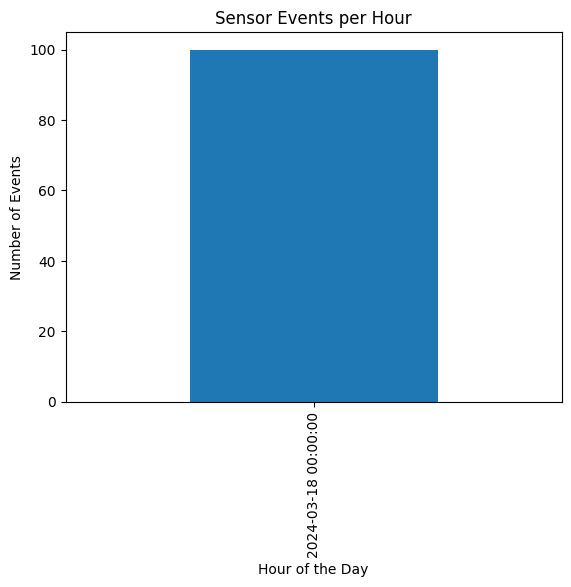

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert timestamp to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Hourly sensor events
hourly_events = df.resample('H', on='Timestamp')['Movement Detected'].count()
hourly_events.plot(kind='bar', title='Sensor Events per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Events')
plt.show()


C:\Users\Shree\AppData\Local\Temp\ipykernel_12772\4021555949.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  lobby_events = lobby_data.resample('H', on='Timestamp')['Movement Detected'].count()


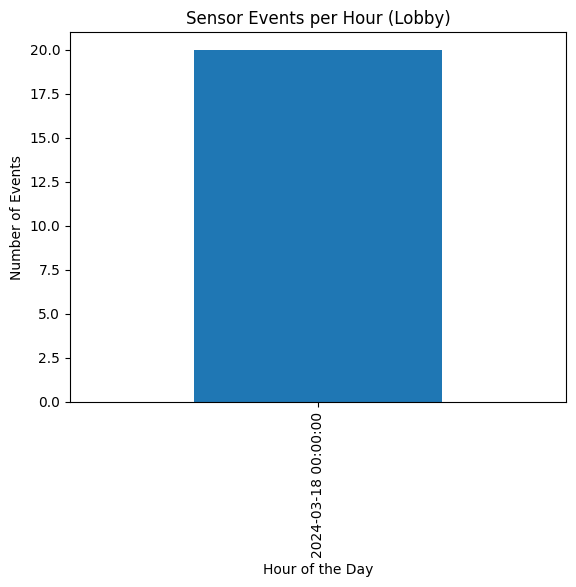

In [65]:
# Analyze specific zone (e.g., Lobby)
lobby_data = df[df['Zone'] == 'Lobby']
lobby_events = lobby_data.resample('H', on='Timestamp')['Movement Detected'].count()
lobby_events.plot(kind='bar', title='Sensor Events per Hour (Lobby)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Events')
plt.show()

# Further Analysis (not shown in code)
# * Analyze other sensor types (door/window open/closed)
# * Identify correlations between sensor events and zones
# * Explore weekday vs. weekend activity patterns



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Movement Detected  100 non-null    object        
 1   Object Detected    100 non-null    object        
 2   Open/Closed        100 non-null    object        
 3   Sensor Type        100 non-null    object        
 4   Timestamp          100 non-null    datetime64[ns]
 5   Zone               100 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 4.8+ KB
None
                           Timestamp
count                            100
mean   2024-03-18 00:26:55.800000256
min              2024-03-18 00:00:00
25%              2024-03-18 00:14:00
50%              2024-03-18 00:24:00
75%              2024-03-18 00:38:30
max              2024-03-18 00:59:00
['Lobby' 'Room 1' 'Main Entrance' 'Hallway' 'Room 2']
['Window Sensor' 'Door Sensor' 'Motion Sens

C:\Users\Shree\AppData\Local\Temp\ipykernel_12772\2792523451.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_events = df.resample('H', on='Timestamp')['Movement Detected'].count()


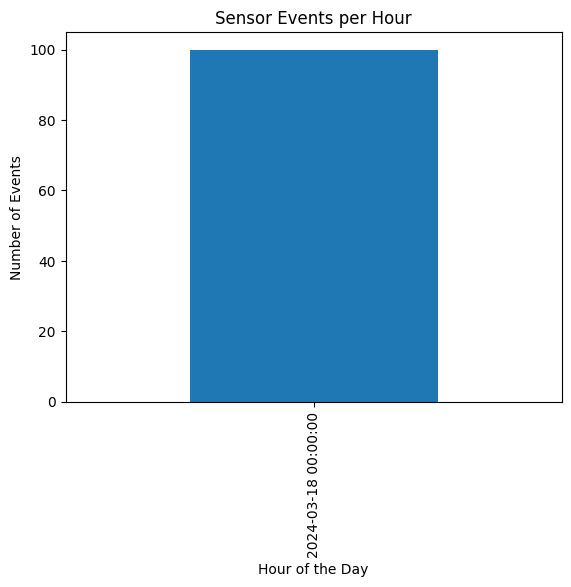

e:\Model-Misfit\new-venv\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


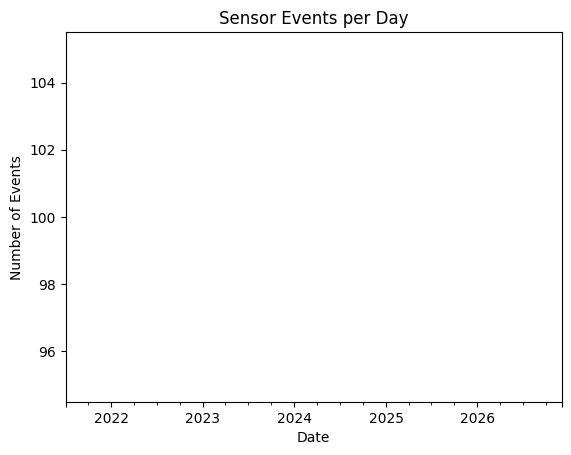

C:\Users\Shree\AppData\Local\Temp\ipykernel_12772\2792523451.py:50: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  lobby_events = lobby_data.resample('H', on='Timestamp')['Movement Detected'].count()


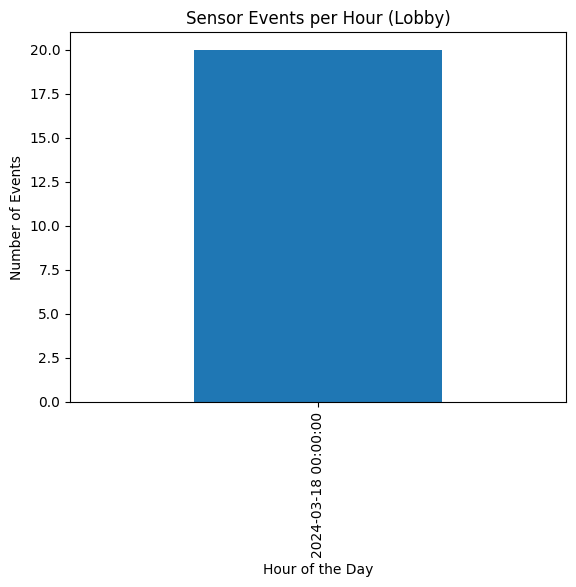

In [66]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert timestamp to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Exploratory Data Analysis (EDA)

# Print basic information about the data
print(df.info())

# Describe numerical columns (if any)
print(df.describe())

# Get unique values for categorical columns
print(df['Zone'].unique())
print(df['Sensor Type'].unique())
print(df['Open/Closed'].unique())

# Analyze distribution of Movement Detected (Yes/No)
movement_counts = df['Movement Detected'].value_counts().sort_values(ascending=False)
print("Movement Detected Counts:")
print(movement_counts)

# Analyze sensor activity by zone
zone_counts = df.groupby('Zone')['Movement Detected'].count().sort_values(ascending=False)
print("Movement Detected by Zone:")
print(zone_counts)

# Time Series Analysis

# Hourly sensor events
hourly_events = df.resample('H', on='Timestamp')['Movement Detected'].count()
hourly_events.plot(kind='bar', title='Sensor Events per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Events')
plt.show()

# Daily sensor events
daily_events = df.resample('D', on='Timestamp')['Movement Detected'].count()
daily_events.plot(kind='line', title='Sensor Events per Day')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.show()

# Analyze specific zone (e.g., Lobby)
lobby_data = df[df['Zone'] == 'Lobby']
lobby_events = lobby_data.resample('H', on='Timestamp')['Movement Detected'].count()
lobby_events.plot(kind='bar', title='Sensor Events per Hour (Lobby)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Events')
plt.show()

# Further Analysis (not shown in code)
# * Analyze other sensor types (door/window open/closed)
# * Identify correlations between sensor events and zones
# * Explore weekday vs. weekend activity patterns
# * Visualize data using heatmaps or histograms

